### Part 1. Algorithmic Implementation - Newton's Method

In [1]:
# Install libraries
%matplotlib inline
import numpy as np
from sympy import *
from scipy import stats
from scipy.optimize import fmin
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random
import time

### 1) func = x1^2 + x2^2 + x3^2      and     x0 = 1,1,1

In [2]:
################################################################################################
#                                        Trivariate Calculation                                #
################################################################################################

# Start at Example:
#x = np.matrix('1;1;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2, x3 = symbols('x1:4')
fn = x1**2 + x2**2 + x3**2

# Lambdify objective function
f = lambdify('x1, x2, x3', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2) 
fnDiffx3 = fn.diff(x3) 
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2], [fnDiffx3]])

# Lambdify
fprime = lambdify('x1, x2, x3', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2) ; fnHessx13 = diff(diff(fn, x1),x3)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) ; fnHessx23 = diff(diff(fn, x2),x3)
fnHessx31 = diff(diff(fn, x3),x1) ; fnHessx32 = diff(diff(fn, x3),x2) ; fnHessx33 = diff(diff(fn, x3),x3) 
fnHess = Matrix([[fnHessx11, fnHessx12, fnHessx13], [fnHessx21, fnHessx22, fnHessx23], [fnHessx31, fnHessx32, fnHessx33]])

# Lambdify
fHess = lambdify('x1, x2, x3', fnHess)

# Calculate Example
#f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0)) , x.item((2,0))))

In [3]:
# Start at
x = np.matrix('1;1;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)) , x.item((2,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0)) , xold.item((2,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0)) , xold.item((2,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0)) , xnew.item((2,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[1]
 [1]
 [1]]


Iteration:  1
Direction:  [[-1.]
 [-1.]
 [-1.]]
New Value:  [[ 0.]
 [ 0.]
 [ 0.]]




Local minimum occurs at: [[ 0.]
 [ 0.]
 [ 0.]]
Number of steps: 1
runtime:  0.007981538772583008


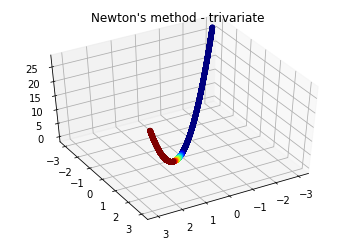

In [4]:
# create the figure, add a 3d axis, set the viewing angle
x = np.linspace(-3,3,10000)
y = np.linspace(-3,3,10000)
z = np.linspace(-3,3,10000)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45,60)

#ax.scatter(x, y, f(x,y,z), c='b', marker='o')
ax.scatter(x, y, f(x,y,z), facecolors=plt.cm.jet(z))
#ax.scatter(x, y, z, facecolors=plt.cm.jet(f(x,y,z)))
plt.title("Newton's method - trivariate")
plt.show()

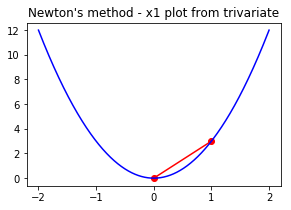

In [5]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)
z = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y,z), c="b")
plt.title("Newton's method - x1 plot from trivariate")

### 2) func = x1^2 + 2*x2^2 - 2*x1*x2 - 2*x2  and x0 = 0,0

In [6]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('0;0')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = x1**2 + 2*x2**2 - 2*x1*x2 - 2*x2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [7]:
# Start at
x = np.matrix('0;0')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[0]
 [0]]


Iteration:  1
Direction:  [[ 1.]
 [ 1.]]
New Value:  [[ 1.]
 [ 1.]]




Local minimum occurs at: [[ 1.]
 [ 1.]]
Number of steps: 1
runtime:  0.006000995635986328


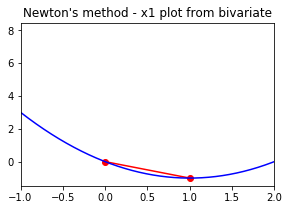

In [8]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-1,2])
plt.title("Newton's method - x1 plot from bivariate")

### 3) func = 100*(x2 - x1**2)^2 + (1-x1)^2 and x0 = -1.2,1

In [9]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('-1.2;1')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = 100*(x2 - x1**2)**2 + (1-x1)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [10]:
# Start at
x = np.matrix('-1.2;1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[-1.2]
 [ 1. ]]


Iteration:  1
Direction:  [[ 0.0247191 ]
 [ 0.38067416]]
New Value:  [[-1.1752809 ]
 [ 1.38067416]]




Iteration:  2
Direction:  [[ 1.93839577]
 [-4.55570801]]
New Value:  [[ 0.76311487]
 [-3.17503385]]




Iteration:  3
Direction:  [[  3.14807708e-04]
 [  3.75785863e+00]]
New Value:  [[ 0.76342968]
 [ 0.58282478]]




Iteration:  4
Direction:  [[ 0.23656563]
 [ 0.36120255]]
New Value:  [[ 0.99999531]
 [ 0.94402732]]




Iteration:  5
Direction:  [[  3.84568681e-07]
 [  5.59640675e-02]]
New Value:  [[ 0.9999957 ]
 [ 0.99999139]]




Local minimum occurs at: [[ 0.9999957 ]
 [ 0.99999139]]
Number of steps: 5
runtime:  0.027016878128051758


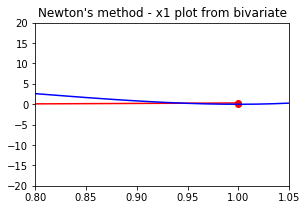

In [11]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-20,20])
plt.xlim([0.8,1.05])
plt.title("Newton's method - x1 plot from bivariate")

### 4) func = (x1+x2)^4 + x2^2 and x0 = 2,-2

In [12]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')
fn = (x1+x2)**4 + x2**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [13]:
# Start at
x = np.matrix('2;-2')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 2]
 [-2]]


LinAlgError: Singular matrix

In [15]:
# No plot. Aborted - singular matrix

### 5.1) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 1

In [16]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=1
fn = (x1-1)**2 + (x2-1)**2 + 1*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [17]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-0.13777778]
 [ 0.58222222]]
New Value:  [[ 0.86222222]
 [-0.41777778]]




Iteration:  2
Direction:  [[-0.01637658]
 [ 0.64345731]]
New Value:  [[ 0.84584565]
 [ 0.22567953]]




Iteration:  3
Direction:  [[-0.19512643]
 [ 0.30862354]]
New Value:  [[ 0.65071922]
 [ 0.53430307]]




Iteration:  4
Direction:  [[-0.07945786]
 [ 0.02804193]]
New Value:  [[ 0.57126136]
 [ 0.562345  ]]




Iteration:  5
Direction:  [[-0.00712175]
 [ 0.0017328 ]]
New Value:  [[ 0.56413961]
 [ 0.5640778 ]]




Iteration:  6
Direction:  [[ -5.26604577e-05]
 [  9.15029835e-06]]
New Value:  [[ 0.56408695]
 [ 0.56408695]]




Local minimum occurs at: [[ 0.56408695]
 [ 0.56408695]]
Number of steps: 6
runtime:  0.023016691207885742


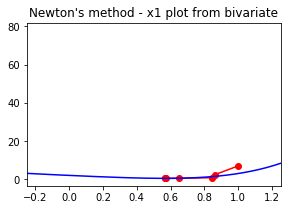

In [18]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.xlim([-0.25,1.25])
plt.title("Newton's method - x1 plot from bivariate")

### 5.2) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 10

In [19]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=10
fn = (x1-1)**2 + (x2-1)**2 + 10*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [20]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-0.28256705]
 [ 0.33812261]]
New Value:  [[ 0.71743295]
 [-0.66187739]]




Iteration:  2
Direction:  [[-0.13873302]
 [ 0.25568559]]
New Value:  [[ 0.57869993]
 [-0.40619181]]




Iteration:  3
Direction:  [[ 0.00758582]
 [ 0.27843456]]
New Value:  [[ 0.58628575]
 [-0.12775725]]




Iteration:  4
Direction:  [[ 0.01495132]
 [ 0.37721291]]
New Value:  [[ 0.60123707]
 [ 0.24945566]]




Iteration:  5
Direction:  [[-0.11551323]
 [ 0.08284177]]
New Value:  [[ 0.48572384]
 [ 0.33229743]]




Iteration:  6
Direction:  [[-0.06664935]
 [ 0.0623204 ]]
New Value:  [[ 0.41907449]
 [ 0.39461783]]




Iteration:  7
Direction:  [[-0.015606  ]
 [ 0.00752029]]
New Value:  [[ 0.40346848]
 [ 0.40213811]]




Iteration:  8
Direction:  [[-0.00085622]
 [ 0.00047081]]
New Value:  [[ 0.40261226]
 [ 0.40260893]]




Iteration:  9
Direction:  [[ -2.24372181e-06]
 [  1.09283333e-06]]
New Value:  [[ 0.40261002]
 [ 0.40261002]]




Local minimu

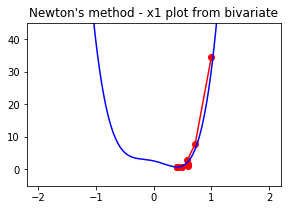

In [21]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-5,45])
plt.title("Newton's method - x1 plot from bivariate")

### 5.3) func = (x1-1)^2 + (x2-1)^2 + c*(x1^2 + x2^2 - 0.25)^2 and x0 = 1,-1 at c = 100

In [24]:
################################################################################################
#                                        Bivariate Calculation                                 #
################################################################################################

# Start at Example:
#x = np.matrix('2,-2')

########################################## Objective ###########################################
# Define and symbolize objective function 
x1, x2= symbols('x1:3')

# at C=100
fn = (x1-1)**2 + (x2-1)**2 + 100*(x1**2 + x2**2 - 0.25)**2

# Lambdify objective function
f = lambdify('x1, x2', fn)

########################################## Derivative ###########################################

# Derivative
fnDiffx1 = fn.diff(x1)
fnDiffx2 = fn.diff(x2)  
fnDeriv = Matrix([[fnDiffx1], [fnDiffx2]])

# Lambdify
fprime = lambdify('x1, x2', fnDeriv)

########################################## Hessian    ###########################################

# Hessian
fnHessx11 = diff(diff(fn, x1),x1) ; fnHessx12 = diff(diff(fn, x1),x2)
fnHessx21 = diff(diff(fn, x2),x1) ; fnHessx22 = diff(diff(fn, x2),x2) 
fnHess = Matrix([[fnHessx11, fnHessx12], [fnHessx21, fnHessx22]])

# Lambdify
fHess = lambdify('x1, x2', fnHess)

# Calculate Example
#x = np.matrix('0;0')
#f(x.item((0,0)) , x.item((1,0)))
#np.asmatrix(fprime(x.item((0,0)) , x.item((1,0))))
#np.asmatrix(fHess(x.item((0,0)) , x.item((1,0))))

In [25]:
# Start at
x = np.matrix('1;-1')
print ("Initial Starting Point at:", x)

# Set convergence Precision and iteration limit
e = 0.00001
itMax = 1000

# Assigning initial values
xold = np.matrix('0;0')
xnew = x
xlist, ylist = [xnew], [f(x.item((0,0)) , x.item((1,0)))]

# Loop Condition for next iteration
fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

# Calculate runtime
starttime = time.time()

# Formula for Newton
while fprimeNorm/(1 + f_abs) > e:
    xold = xnew
    fprimeVal = np.asmatrix(fprime(xold.item((0,0)) , xold.item((1,0))))
    fHessVal = np.asmatrix(fHess(xold.item((0,0)) , xold.item((1,0))))
        
    # Halting at itMax iterations to avoid convergence failure and computational overhead.    
    if (len(xlist) == itMax) :
        break;
    
    # Calculate direction
    direction = -1 * np.linalg.inv(fHessVal) * fprimeVal
    
    # Calculate new x
    xnew = xold + direction
    
    # Print search Dir, step length, new value: For first 10 and last 5 iterations
    if (len(xlist) <= 10):
        print("\n")
        print("Iteration: ",len(xlist))    
        print("Direction: ",direction)      
        print("New Value: ",xnew)
        print("\n")
        
    if (len(xlist) > 10): 
        print(".", end = "")    
    
    xlist.append(xnew)
    ylist.append(f(xnew.item((0,0)) , xnew.item((1,0))))
    
    # Loop Condition for next iteration
    fprimeNorm = np.linalg.norm(np.asmatrix(fprime(xnew.item((0,0)) , xnew.item((1,0)))))
    f_abs = abs(f(xnew.item((0,0)) , xnew.item((1,0))))

runtime = time.time() - starttime 
print("\n")

if (len(xlist) == itMax):
    print ("No Solution has been found after %s iterations" %itMax)
    
else:
    print ("Local minimum occurs at:", xnew)
    print ("Number of steps:", len(xlist)-1)

print ("runtime: ", runtime)

Initial Starting Point at: [[ 1]
 [-1]]


Iteration:  1
Direction:  [[-0.30210321]
 [ 0.30780122]]
New Value:  [[ 0.69789679]
 [-0.69219878]]




Iteration:  2
Direction:  [[-0.18276343]
 [ 0.19508045]]
New Value:  [[ 0.51513336]
 [-0.49711834]]




Iteration:  3
Direction:  [[-0.08818809]
 [ 0.12183502]]
New Value:  [[ 0.42694527]
 [-0.37528331]]




Iteration:  4
Direction:  [[ 0.0140617 ]
 [ 0.10790354]]
New Value:  [[ 0.44100697]
 [-0.26737977]]




Iteration:  5
Direction:  [[ 0.15559164]
 [ 0.28849792]]
New Value:  [[ 0.5965986 ]
 [ 0.02111815]]




Iteration:  6
Direction:  [[-0.07588372]
 [ 0.04061782]]
New Value:  [[ 0.52071489]
 [ 0.06173598]]




Iteration:  7
Direction:  [[-0.03458979]
 [ 0.1430248 ]]
New Value:  [[ 0.4861251 ]
 [ 0.20476077]]




Iteration:  8
Direction:  [[-0.04831143]
 [ 0.066701  ]]
New Value:  [[ 0.43781367]
 [ 0.27146177]]




Iteration:  9
Direction:  [[-0.04733248]
 [ 0.06390617]]
New Value:  [[ 0.39048119]
 [ 0.33536794]]




Iteration:  10
Directi

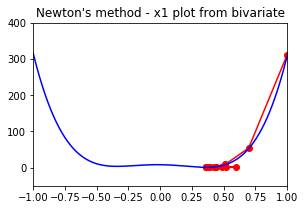

In [26]:
x = np.linspace(-2,2,10000)
y = np.linspace(-2,2,10000)

# Get x1 values. i.e. first column from matrix
x1valsArray = np.asmatrix(np.asarray(xlist))
x1vals = list(np.squeeze(np.matrix.tolist(x1valsArray[:,0])))

# Plot the descent
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x1vals,ylist,c="r")

plt.plot(x1vals,ylist,c="r")
plt.plot(x,f(x,y), c="b")
plt.ylim([-50,400])
plt.xlim([-1,1])
plt.title("Newton's method - x1 plot from bivariate")